# Importer les bibliotheques
importer les bibliothèques nécessaires pour exécuter le programme.Pandas et Numpy sont utilisées pour manipuler les données,Seaborn et Matplotlib sont utilisées pour tracer des graphiques,Plotly est utilisée pour créer des graphiques interactifs,et Sklearn est utilisé pour entraîner et évaluer un modèle. Le symbole "%" devant "matplotlib inline" indique que les graphiques créés avec Matplotlib doivent être affichés directement dans le notebook Jupyter. La ligne "warnings.filterwarnings('ignore')" ignore les avertissements générés par le programme.

In [477]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import date
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# import warnings
# warnigs.fillterwarnings('ignore')


# Problem:
Lors de l'épidémie de COVID-19, il est crucial de prédire l'évolution de la propagation du virus pour aider les gouvernements et les organisations de santé publique à prendre des mesures proactives pour limiter la propagation du virus et prévenir des pertes de vie. La prédiction des cas confirmés et des décès est importante pour planifier les ressources hospitalières, les fournitures médicales, les vaccins, etc. Les prévisions précises peuvent aider à éviter la surcharge des systèmes de santé, ce qui peut entraîner des complications graves pour les patients atteints de COVID-19. De plus, cela peut également aider les gouvernements à prendre des mesures de confinement ou d'ouverture en fonction de l'évolution de la pandémie.
## En bref l'objectif est :
- Prédiction des pays les plus touchés de covid19
- Prédiction du nombre de cas confirmés pour prévoir l'évolution de la maladie.
- Prédiction du nombre de décès pour évaluer l'impact de la maladie sur la population et pour planifier les ressources médicales.


# L'analyse exploratoire des données
## Objectif:
L'analyse exploratoire des données (EDA) est une étape cruciale pour comprendre les propriétés des données, identifier des relations et des corrélations entre les variables, préparer les données pour la modélisation, et identifier des hypothèses ou des questions de recherche pour les études ultérieures. C'est un processus itératif et interactif qui permet de mieux comprendre les données pour prendre des décisions éclairées. En bref, l'objectif de l'EDA est de comprendre les données, identifier les tendances et les relations, et préparer les données pour une analyse plus approfondie.

## Checklist de base

- **variable target** : "ConfirmedCases","Fatalities".
- **lignes et colonnes** : 35995, 6
- **types de variables** :
    object     3
    float64    2
    int64      1
- **Analyse des valeurs manquantes** : il n'y a pas de valeurs manquantes pour les colonnes 'Id', 'Country_Region', 'Date' , 'ConfirmedCases' et 'Fatalities' mais il y a des valeurs manquantes pour la colonne 'Province_State' qui représente 57% des valeurs.




# importer les fichiers

In [478]:
df = pd.read_csv("/home/ubuntu/bureau/didi M1/M1 GL/SAD/SAD_covid_final/SAD_covid/Dataset/train.csv")


# Analyse des données

#### visualiser les 10 premières lignes du DataFrame "df":
Cela permet de vérifier que le fichier CSV a bien été importé ,et de voir un aperçu des données contenues dans le DataFrame.

In [479]:

df.head(10)

Id Province_State Country_Region        Date  ConfirmedCases  Fatalities
0   1            NaN    Afghanistan  2020-01-22             0.0         0.0
1   2            NaN    Afghanistan  2020-01-23             0.0         0.0
2   3            NaN    Afghanistan  2020-01-24             0.0         0.0
3   4            NaN    Afghanistan  2020-01-25             0.0         0.0
4   5            NaN    Afghanistan  2020-01-26             0.0         0.0
5   6            NaN    Afghanistan  2020-01-27             0.0         0.0
6   7            NaN    Afghanistan  2020-01-28             0.0         0.0
7   8            NaN    Afghanistan  2020-01-29             0.0         0.0
8   9            NaN    Afghanistan  2020-01-30             0.0         0.0
9  10            NaN    Afghanistan  2020-01-31             0.0         0.0

## Affiche les informations du DataFrame,
y compris le type de données de chaque colonne,le nombre de valeurs non nulles et la mémoire utilisée.

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35995 entries, 0 to 35994
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              35995 non-null  int64  
 1   Province_State  15295 non-null  object 
 2   Country_Region  35995 non-null  object 
 3   Date            35995 non-null  object 
 4   ConfirmedCases  35995 non-null  float64
 5   Fatalities      35995 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


### Affiche la taille du dataframe (nombre de lignes et nombre de colonnes).

In [481]:

print(df.shape)

(35995, 6)


### Compter le nombre de colonnes de chaque type de données 
"df.dtypes.value_counts()" est une méthode qui permet de compter le nombre de colonnes de chaque type de données dans un DataFrame pandas. Elle retourne un objet Series qui contient le nombre de colonnes de chaque type de données (par exemple, int64, float64, object, etc.) comme valeurs, et les types de données comme index.

In [482]:
df.dtypes.value_counts()

object     3
float64    2
int64      1
dtype: int64

## Heatmap 
en utilisant la fonction heatmap de la bibliothèque seaborn pour créer une carte thermique des valeurs manquantes dans le dataframe df. La heatmap affichera les valeurs manquantes, où le blanc représente les valeurs manquantes et le noir représente les valeurs non manquantes. Le paramètre "cbar=False" est utilisé pour supprimer la barre de couleur de la heatmap.

<AxesSubplot:>

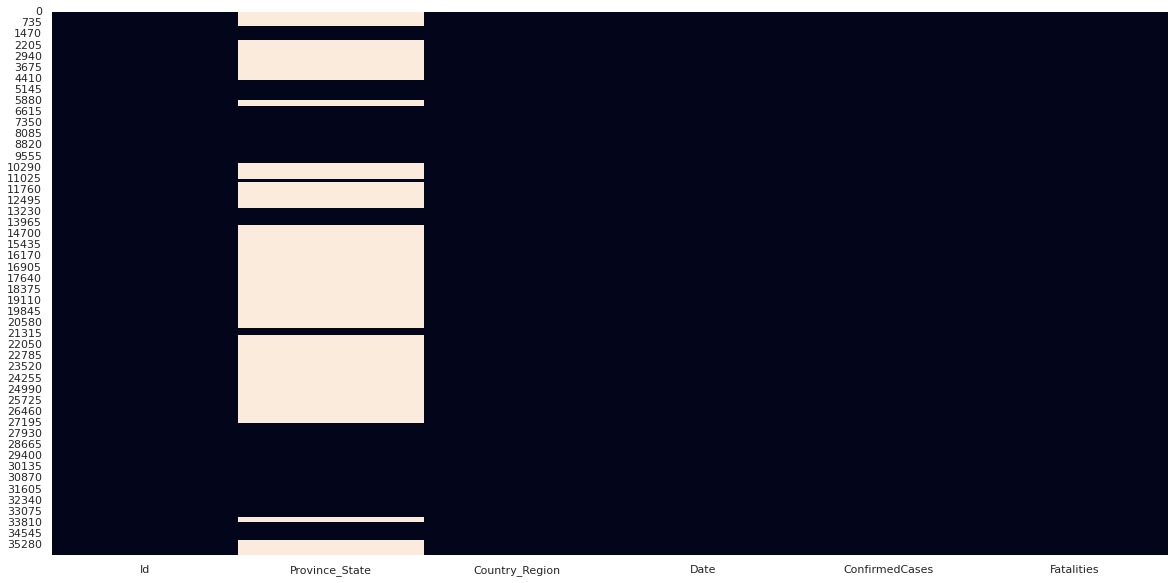

In [483]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

### Comptage des valeurs manquantes 

In [484]:
df.isnull().sum()

Id                    0
Province_State    20700
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

### Pourcentage de valeurs manquantes dans chaque colonne triées par ordre décroissant

In [485]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Province_State    0.57508
Id                0.00000
Country_Region    0.00000
Date              0.00000
ConfirmedCases    0.00000
Fatalities        0.00000
dtype: float64

### Résumé statistique des colonnes numériques dans le DataFrame
Cette ligne affiche un résumé statistique des données du DataFrame,incluant le compte, la moyenne, l'écart type, la valeur minimale, la valeur maximale,ainsi que les quartiles pour chaque colonne numérique.

In [486]:
df.describe()

Id  ConfirmedCases    Fatalities
count  35995.000000    35995.000000  35995.000000
mean   17998.000000     3683.508737    243.560217
std    10391.005806    18986.978708   1832.966999
min        1.000000        0.000000      0.000000
25%     8999.500000        0.000000      0.000000
50%    17998.000000       19.000000      0.000000
75%    26996.500000      543.000000      7.000000
max    35995.000000   345813.000000  33998.000000

# nettoyage des données
créer une copie du DataFrame df et la stocke dans df_train, puis supprime la colonne "Province_State" de df_train en utilisant la méthode "drop".La valeur "axis=1" spécifie que la colonne doit être supprimée de l'ensemble de colonnes du DataFrame.

In [487]:
df_train = df.copy()
df_train = df_train.drop(['Province_State'],axis=1)

In [488]:
df_train = df_train.drop(['Id'],axis=1)

In [489]:
#refaire l'affichage du nombre de valeurs manquantes pour chaque colonne dans
#le dataframe df pour confirmer que y pas de colonnes vides.
df_train.isnull().sum()

Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

<AxesSubplot:>

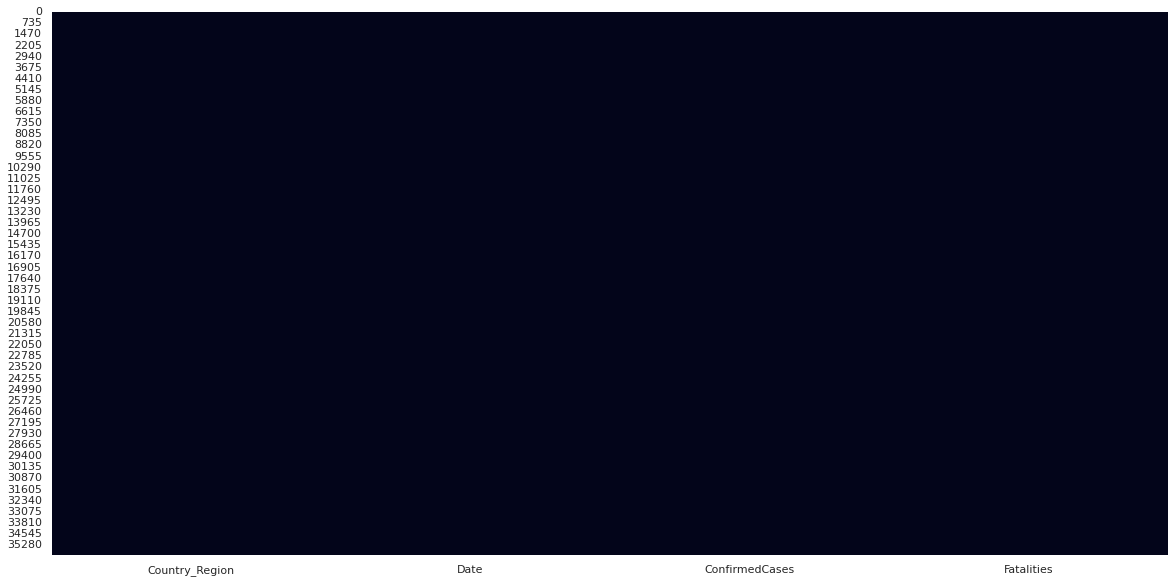

In [490]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.isna(), cbar=False)

# Pie chart

In [491]:
# Le graphique affiche le nombre de cas confirmés de COVID-19 par pays.
fig = px.pie(df_train, values ='ConfirmedCases', names ='Country_Region')
fig.update_traces(textposition='inside')
fig.update_layout (uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()


In [492]:
# Le graphique affiche le nombre de décès de COVID-19 par pays.
fig = px.pie(df_train, values ='Fatalities', names ='Country_Region')
fig.update_traces(textposition='inside')
fig.update_layout (uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()


## Heatmap (Correlation)

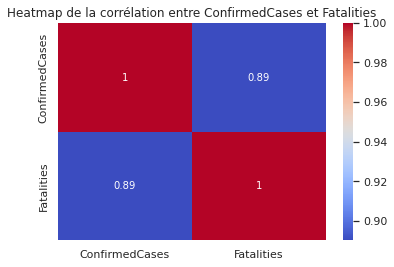

In [493]:

# Calculez la matrice de corrélation pour les colonnes ConfirmedCases et Fatalities
corr = df_train[['ConfirmedCases', 'Fatalities']].corr()

# Créez un heatmap en utilisant la matrice de corrélation
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Ajoutez un titre à la figure
plt.title("Heatmap de la corrélation entre ConfirmedCases et Fatalities")

# Affichez la figure
plt.show()


# Pairplot
pairplot est une fonction de la librairie seaborn qui permet de créer un ensemble de graphiques de dispersion pour tous les couples de variables quantitatives d'un DataFrame. Cela permet de visualiser les relations entre les différentes variables et de détecter des tendances ou des modèles dans les données. Il est également possible de spécifier un paramètre "hue" pour visualiser les relations en fonction d'une variable catégorique.

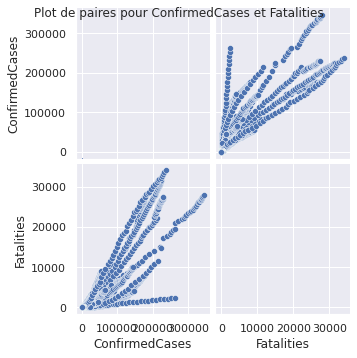

In [495]:
import seaborn as sns

# Sélectionnez les colonnes ConfirmedCases et Fatalities pour le plot de paires
cols = ['ConfirmedCases', 'Fatalities']

# Créez un plot de paires en utilisant les colonnes sélectionnées
sns.pairplot(df_train[cols], kind='scatter')

# Ajoutez un titre à la figure
plt.suptitle("Plot de paires pour ConfirmedCases et Fatalities")

# Affichez la figure
plt.show()


# ScatterPlot
Un scatter plot est un type de graphique utilisé pour afficher les relations entre deux variables en utilisant des points pour représenter les valeurs de ces variables. Il permet de visualiser la dispersion des données et peut être utilisé pour identifier des tendances ou des corrélations éventuelles entre les variables.

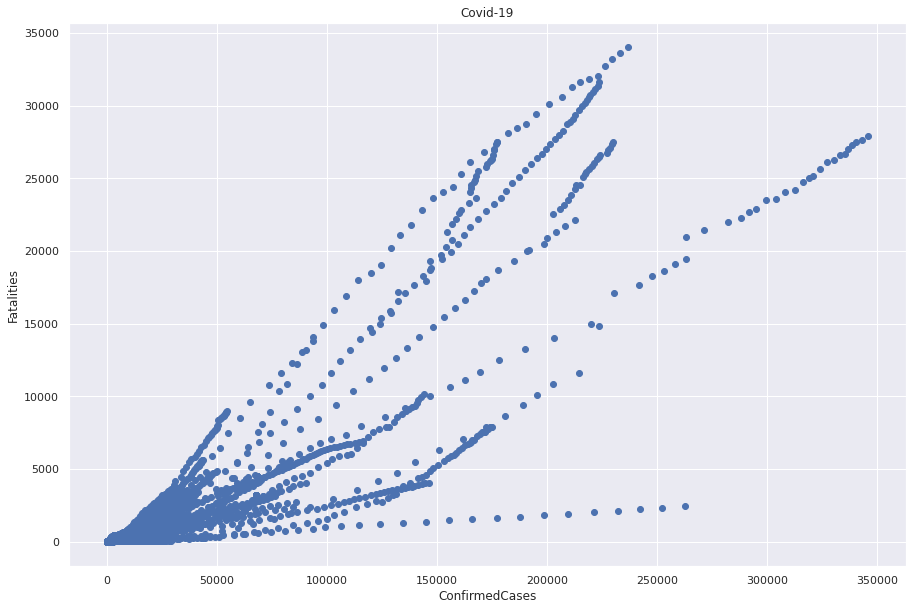

In [590]:
# create a figure and axis
fig, ax = plt.subplots()
ax.scatter(df_train['ConfirmedCases'], df_train['Fatalities'])
# set a title and labels
ax.set_title('Covid-19')
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()

### Tri de la colonne ConfirmedCases et suppression des doublons de la colonne Country_Region dans le DataFrame dc

In [496]:
dc = df_train.sort_values(by=['ConfirmedCases'], axis=0, ascending=False)
dc.drop_duplicates(subset=["Country_Region"], inplace=True)
dc

Country_Region        Date  ConfirmedCases  Fatalities
31164                US  2020-05-15        345813.0     27878.0
23574            Russia  2020-05-15        262843.0      2418.0
35074    United Kingdom  2020-05-15        236711.0     33998.0
25644             Spain  2020-05-15        230183.0     27459.0
16904             Italy  2020-05-15        223885.0     31610.0
...                 ...         ...             ...         ...
24722        Seychelles  2020-05-13            11.0         0.0
25973          Suriname  2020-04-29            10.0         1.0
18971        MS Zaandam  2020-05-12             9.0         2.0
22654  Papua New Guinea  2020-05-15             8.0         0.0
35737    Western Sahara  2020-04-18             6.0         0.0

[184 rows x 4 columns]

## Extraction des 5 pays avec le plus de cas confirmés

In [497]:
top5c = dc.head(5)
top5c

Country_Region        Date  ConfirmedCases  Fatalities
31164              US  2020-05-15        345813.0     27878.0
23574          Russia  2020-05-15        262843.0      2418.0
35074  United Kingdom  2020-05-15        236711.0     33998.0
25644           Spain  2020-05-15        230183.0     27459.0
16904           Italy  2020-05-15        223885.0     31610.0

##  Cas confirmés des cinq pays les plus touchés et de l'Algérie

In [498]:
max_index = df_train.loc[df_train['Country_Region'] == 'Algeria', 'ConfirmedCases'].idxmax()
max_row = df_train.loc[max_index]
top5cas = top5c.append(max_row)
top5cas.reset_index(drop=True, inplace=True)
top5cas

/tmp/ipykernel_3277/3557540637.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Country_Region        Date  ConfirmedCases  Fatalities
0              US  2020-05-15        345813.0     27878.0
1          Russia  2020-05-15        262843.0      2418.0
2  United Kingdom  2020-05-15        236711.0     33998.0
3           Spain  2020-05-15        230183.0     27459.0
4           Italy  2020-05-15        223885.0     31610.0
5         Algeria  2020-05-15          6629.0       536.0

## Bar plot
Un bar plot est un type de graphique utilisé pour représenter des données catégorielles. Il se présente sous la forme d'un ensemble de barres horizontales ou verticales, chacune représentant une catégorie et sa hauteur correspondant à la valeur associée. Il est souvent utilisé pour comparer des données entre plusieurs groupes ou pour visualiser les données d'une seule catégorie.

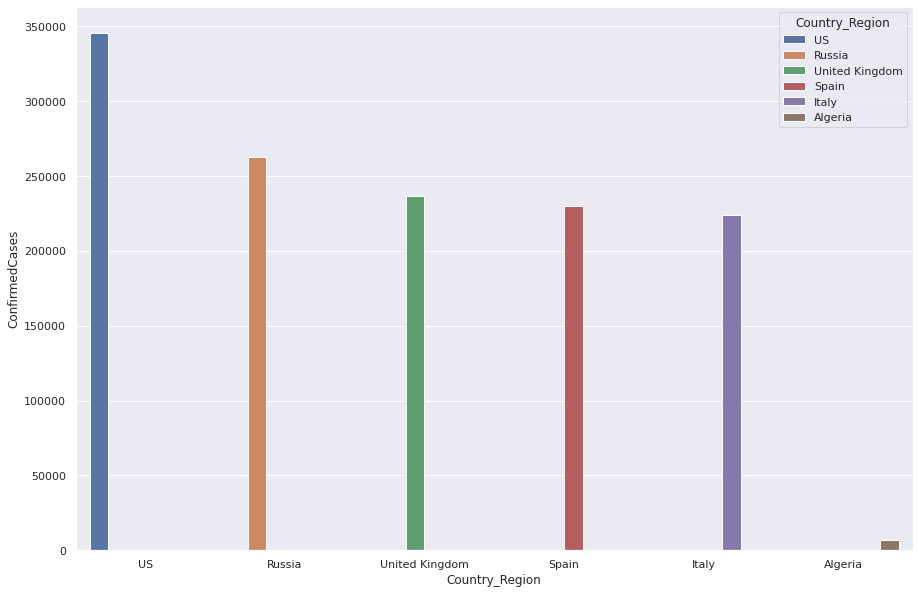

In [499]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize': (15, 10)})
sns.barplot(x="Country_Region",y="ConfirmedCases",data=top5cas,hue="Country_Region")
plt.show()

In [500]:
dF = df_train.sort_values(by=['Fatalities'], axis=0, ascending=False)
dF.drop_duplicates(subset=["Country_Region"], inplace=True)
dF

Country_Region        Date  ConfirmedCases  Fatalities
35074  United Kingdom  2020-05-15        236711.0     33998.0
16904           Italy  2020-05-15        223885.0     31610.0
31164              US  2020-05-15        345813.0     27878.0
14259          France  2020-05-15        177319.0     27485.0
25644           Spain  2020-05-15        230183.0     27459.0
...               ...         ...             ...         ...
20755         Namibia  2020-03-17             2.0         0.0
20617      Mozambique  2020-02-23             0.0         0.0
12864            Fiji  2020-04-30            18.0         0.0
14995         Grenada  2020-03-07             0.0         0.0
15754        Holy See  2020-05-15            12.0         0.0

[184 rows x 4 columns]

In [501]:
dff = dF.head(5)
dff

Country_Region        Date  ConfirmedCases  Fatalities
35074  United Kingdom  2020-05-15        236711.0     33998.0
16904           Italy  2020-05-15        223885.0     31610.0
31164              US  2020-05-15        345813.0     27878.0
14259          France  2020-05-15        177319.0     27485.0
25644           Spain  2020-05-15        230183.0     27459.0

In [502]:
max_index = df_train.loc[df_train['Country_Region'] == 'Algeria', 'Fatalities'].idxmax()
max_row = df_train.loc[max_index]
topdff = dff.append(max_row)
topdff.reset_index(drop=True, inplace=True)
topdff

/tmp/ipykernel_3277/3110931110.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Country_Region        Date  ConfirmedCases  Fatalities
0  United Kingdom  2020-05-15        236711.0     33998.0
1           Italy  2020-05-15        223885.0     31610.0
2              US  2020-05-15        345813.0     27878.0
3          France  2020-05-15        177319.0     27485.0
4           Spain  2020-05-15        230183.0     27459.0
5         Algeria  2020-05-15          6629.0       536.0

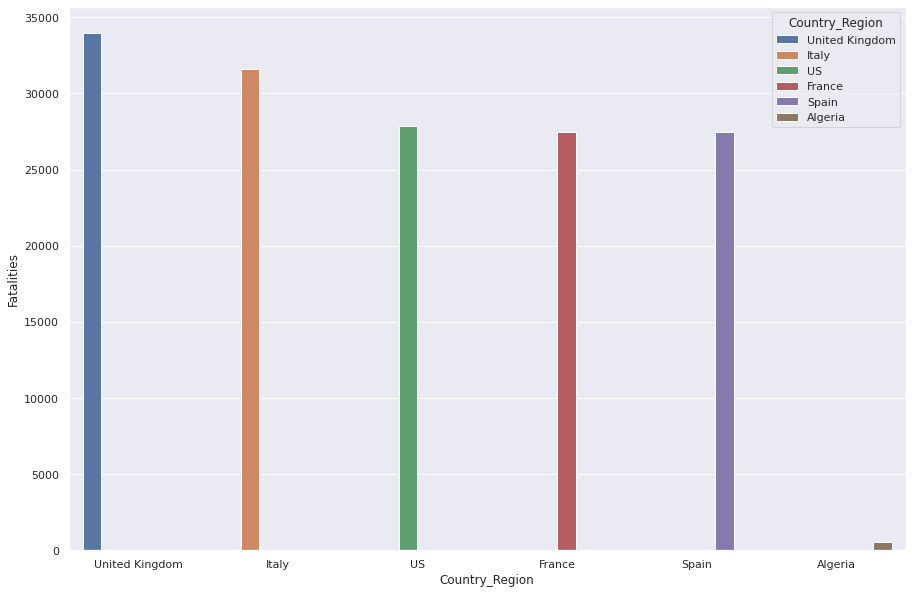

In [503]:
#Making bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize': (15, 10)})
sns.barplot(x="Country_Region",y="Fatalities",data=topdff,hue="Country_Region")
plt.show()

# Line plot
Un line plot est un type de graphique qui montre les tendances d'une variable en fonction d'une autre variable au fil du temps ou des données. Il se compose d'une série de points reliés par des lignes droites pour montrer la variation d'une variable.

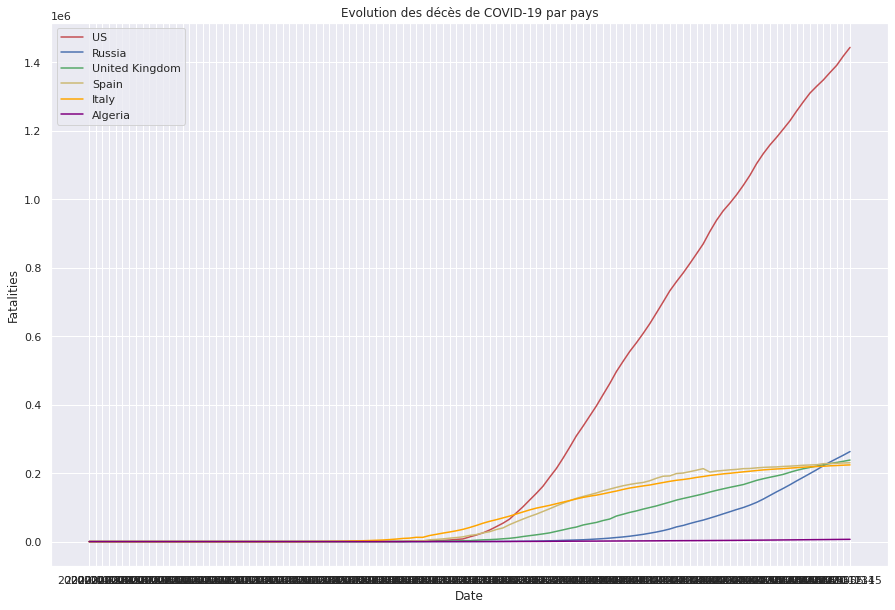

In [505]:
# Sélectionnez les données pour les pays spécifiés
df_selected_countries = df_train[df_train['Country_Region'].isin(['US','Russia','United Kingdom','Spain','Italy','Algeria'])]

# Groupez les données par date et par pays
grouped_data = df_selected_countries.groupby(['Date','Country_Region'])['ConfirmedCases'].sum().reset_index()

# Créez une liste de couleurs pour chaque pays
colors = ['r','b','g','y','orange','purple']

# Créez un nouveau graphique en lignes
plt.figure()

# Itérez sur chaque pays dans la liste
for i, country in enumerate(['US','Russia','United Kingdom','Spain','Italy','Algeria']):
    # Sélectionnez les données pour ce pays
    country_data = grouped_data[grouped_data['Country_Region'] == country]
    
    # Tracer la ligne pour ce pays
    plt.plot(country_data['Date'], country_data['ConfirmedCases'], color=colors[i], label=country)

# Ajoutez un titre et modifiez les étiquettes des axes
plt.title('Evolution des décès de COVID-19 par pays')
plt.xlabel('Date')
plt.ylabel('Fatalities')
plt.legend()

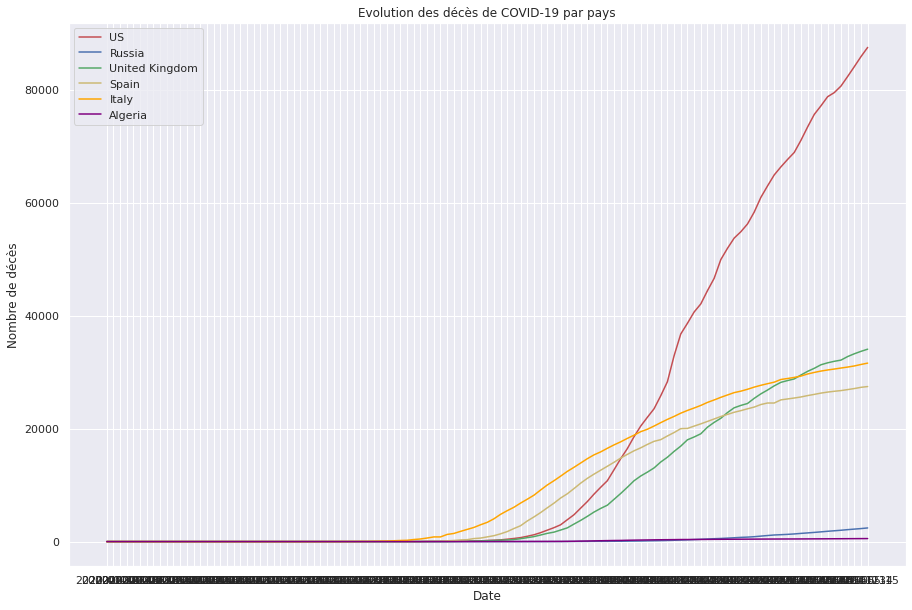

In [506]:
# Sélectionnez les données pour les pays spécifiés
df_selected_countries = df_train[df_train['Country_Region'].isin(['US','Russia','United Kingdom','Spain','Italy','Algeria'])]

# Groupez les données par date et par pays
grouped_data = df_selected_countries.groupby(['Date','Country_Region'])['Fatalities'].sum().reset_index()

# Créez une liste de couleurs pour chaque pays
colors = ['r','b','g','y','orange','purple']

# Créez un nouveau graphique en lignes
plt.figure()

# Itérez sur chaque pays dans la liste
for i, country in enumerate(['US','Russia','United Kingdom','Spain','Italy','Algeria']):
    # Sélectionnez les données pour ce pays
    country_data = grouped_data[grouped_data['Country_Region'] == country]
    
    # Tracer la ligne pour ce pays
    plt.plot(country_data['Date'], country_data['Fatalities'], color=colors[i], label=country)

# Ajoutez un titre et modifiez les étiquettes des axes
plt.title('Evolution des décès de COVID-19 par pays')
plt.xlabel('Date')
plt.ylabel('Nombre de décès')
plt.legend()

# Tendance des cas confirmés des décès dans le monde

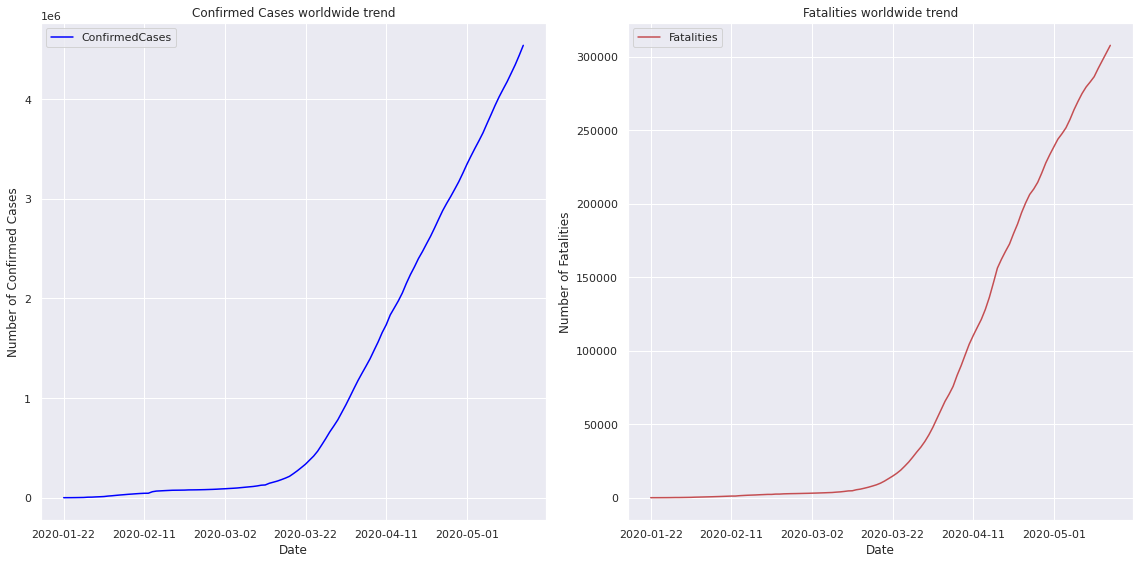

In [509]:
#create a figure with two subplots, each representing the trend of either confirmed cases or fatalities worldwide. 
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
df.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
plt.ylabel('Number of Confirmed Cases')
plt.legend()
plt.title('Confirmed Cases worldwide trend')

plt.subplot(1,2,2)
df_train.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Fatalities')
plt.title("Fatalities worldwide trend")
plt.legend()
plt.tight_layout()

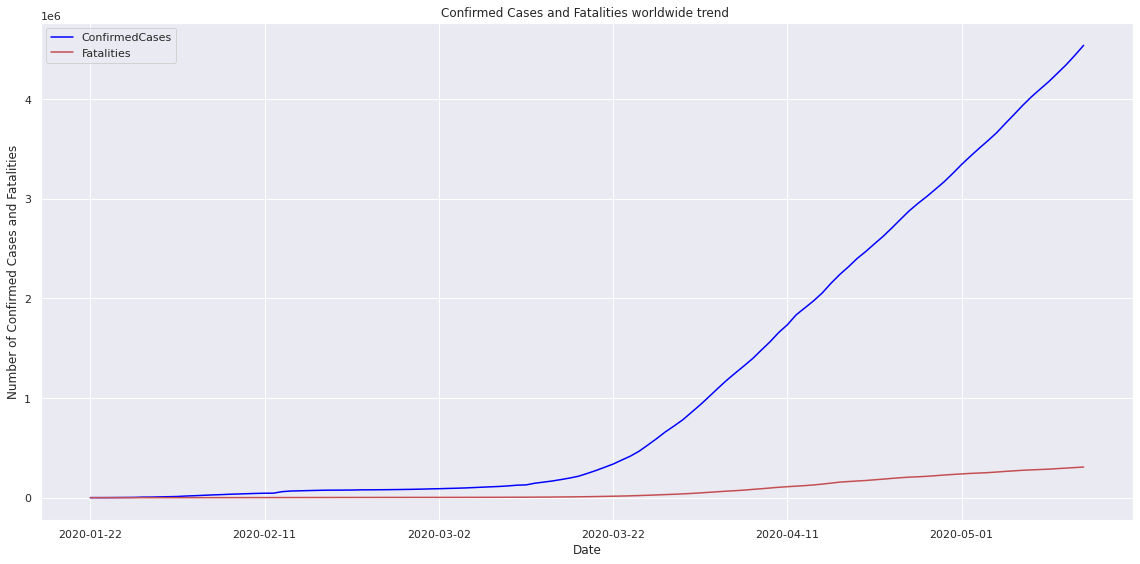

In [510]:

plt.figure(figsize=(16,8))
df_train.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
df_train.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()
     

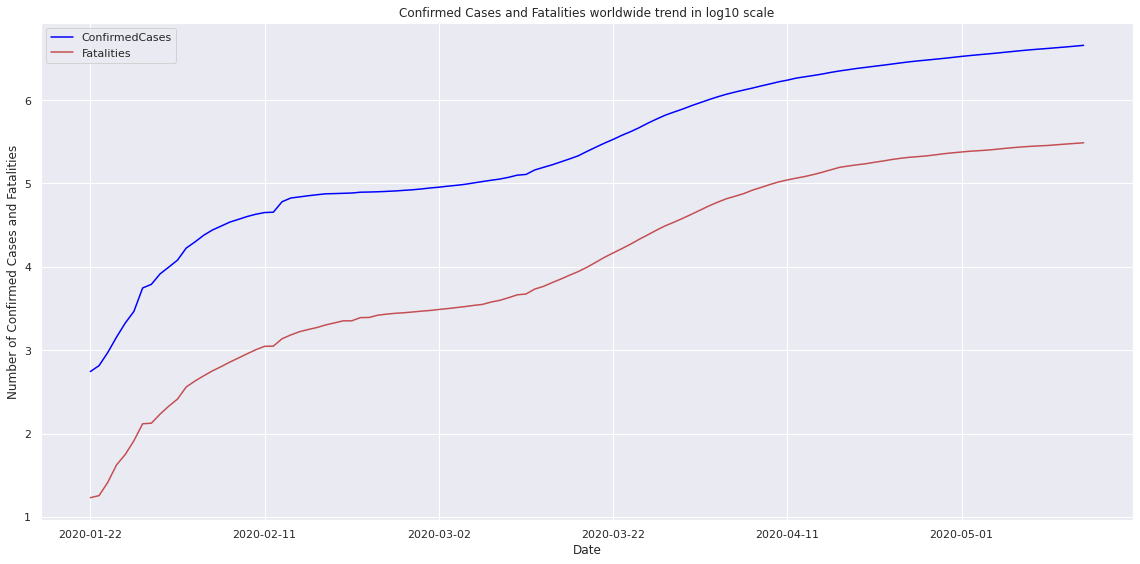

In [511]:
#allow for the small values to be more visible on the graph
plt.figure(figsize=(16,8))
np.log10(df_train.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(df_train.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()

In [512]:
cc=df_train.groupby('Date')['ConfirmedCases'].sum()
ft=df_train.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)
     

0.9967614138191035


"r_squared" est un indicateur de la performance du model. Il mesure la proportion de la variance de la variable dépendante (y) qui est expliquée par la variable indépendante (x) utilisée pour entraîner le modèle. Plus r_squared est proche de 1, plus le modèle est efficace dans la prédiction de la variable dépendante.


# Analyses statistiques sur US

In [513]:
us= df_train[df_train.Country_Region =='US']
us

Country_Region        Date  ConfirmedCases  Fatalities
27255             US  2020-01-22             0.0         0.0
27256             US  2020-01-23             0.0         0.0
27257             US  2020-01-24             0.0         0.0
27258             US  2020-01-25             0.0         0.0
27259             US  2020-01-26             0.0         0.0
...              ...         ...             ...         ...
33460             US  2020-05-11           669.0         7.0
33461             US  2020-05-12           675.0         7.0
33462             US  2020-05-13           688.0         7.0
33463             US  2020-05-14           701.0         7.0
33464             US  2020-05-15           716.0         7.0

[6210 rows x 4 columns]

In [514]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6210 entries, 27255 to 33464
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  6210 non-null   object 
 1   Date            6210 non-null   object 
 2   ConfirmedCases  6210 non-null   float64
 3   Fatalities      6210 non-null   float64
dtypes: float64(2), object(2)
memory usage: 242.6+ KB


In [515]:
print(us.shape)

(6210, 4)


In [516]:
us.describe()

ConfirmedCases    Fatalities
count     6210.000000   6210.000000
mean      6400.817391    341.800161
std      25404.042048   1808.984234
min          0.000000      0.000000
25%          0.000000      0.000000
50%         52.000000      0.000000
75%       2716.750000     73.000000
max     345813.000000  27878.000000

In [517]:
us.isnull().sum()

Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

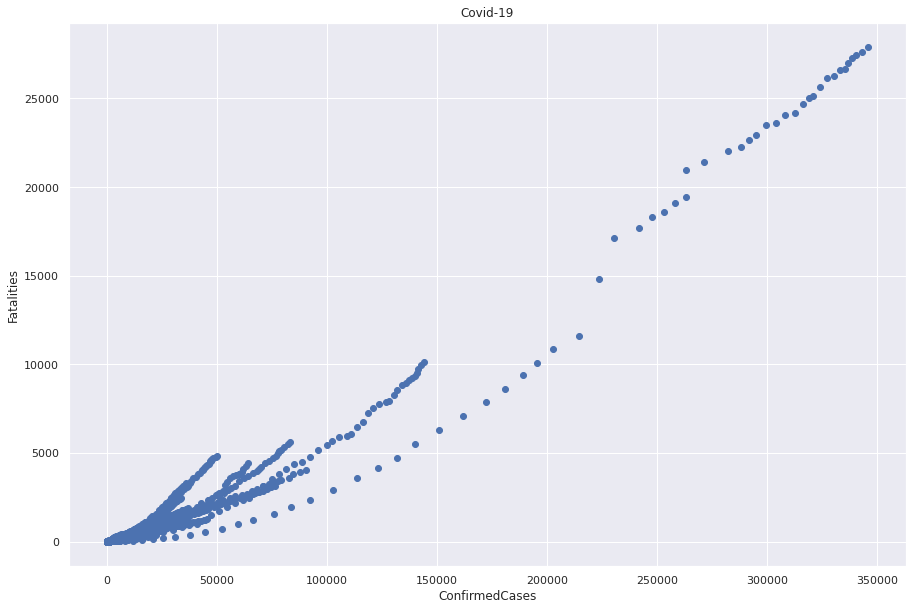

In [518]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(us['ConfirmedCases'], us['Fatalities'])
# set a title and labels
ax.set_title('Covid-19')
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()


<AxesSubplot:>

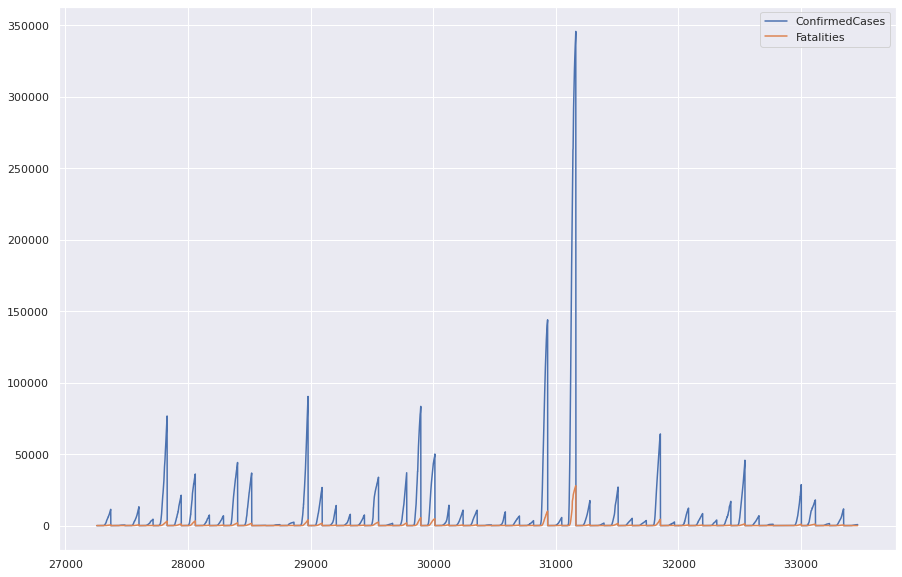

In [519]:

cases_deaths_df = us[['ConfirmedCases', 'Fatalities']]

# Plot the confirmed cases and deaths on the same chart
cases_deaths_df.plot()



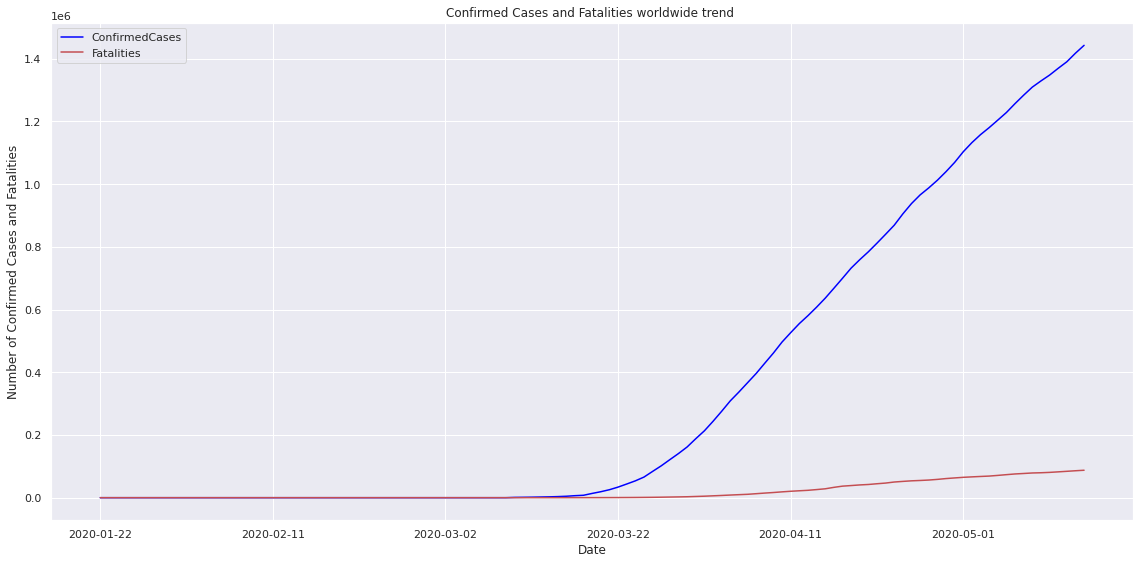

In [521]:
plt.figure(figsize=(16,8))
us.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
us.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()

/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



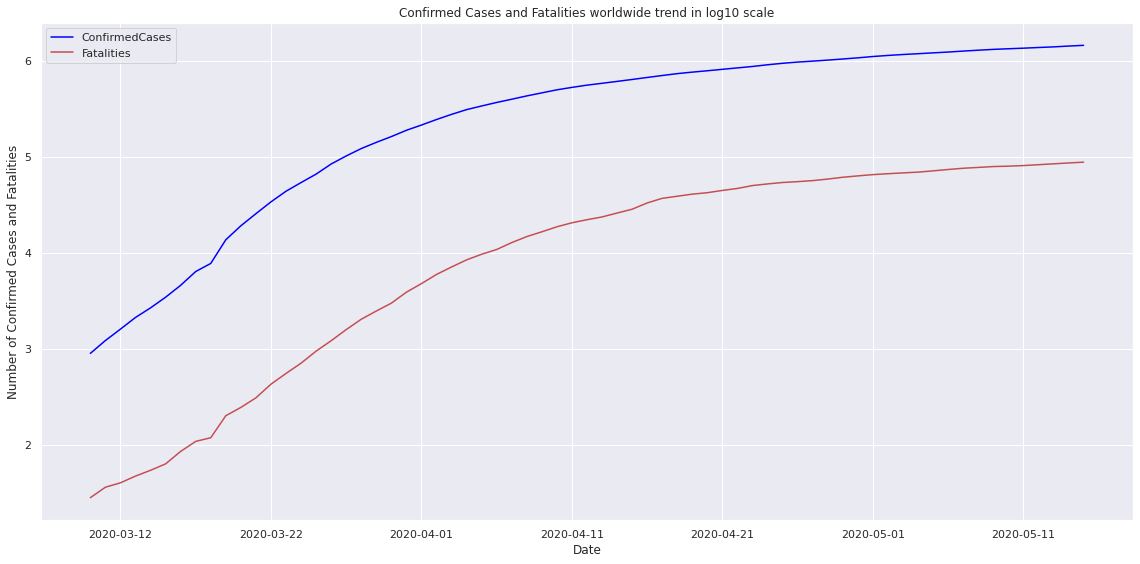

In [522]:
plt.figure(figsize=(16,8))
np.log10(us.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(us.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()


In [523]:
cc=us.groupby('Date')['ConfirmedCases'].sum()
ft=us.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9835214292540188


# Analyses statistiques sur UK

In [524]:
uk= df_train[df_train.Country_Region =='United Kingdom']
uk

Country_Region        Date  ConfirmedCases  Fatalities
33810  United Kingdom  2020-01-22             0.0         0.0
33811  United Kingdom  2020-01-23             0.0         0.0
33812  United Kingdom  2020-01-24             0.0         0.0
33813  United Kingdom  2020-01-25             0.0         0.0
33814  United Kingdom  2020-01-26             0.0         0.0
...               ...         ...             ...         ...
35070  United Kingdom  2020-05-11        223060.0     32065.0
35071  United Kingdom  2020-05-12        226463.0     32692.0
35072  United Kingdom  2020-05-13        229705.0     33186.0
35073  United Kingdom  2020-05-14        233151.0     33614.0
35074  United Kingdom  2020-05-15        236711.0     33998.0

[1265 rows x 4 columns]

In [525]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 33810 to 35074
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  1265 non-null   object 
 1   Date            1265 non-null   object 
 2   ConfirmedCases  1265 non-null   float64
 3   Fatalities      1265 non-null   float64
dtypes: float64(2), object(2)
memory usage: 49.4+ KB


In [526]:
print(uk.shape)

(1265, 4)


In [527]:
uk.describe()

ConfirmedCases    Fatalities
count     1265.000000   1265.000000
mean      5027.872727    737.788933
std      27976.456776   4194.260121
min          0.000000      0.000000
25%          0.000000      0.000000
50%          2.000000      0.000000
75%         32.000000      1.000000
max     236711.000000  33998.000000

In [528]:
uk.isnull().sum()

Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

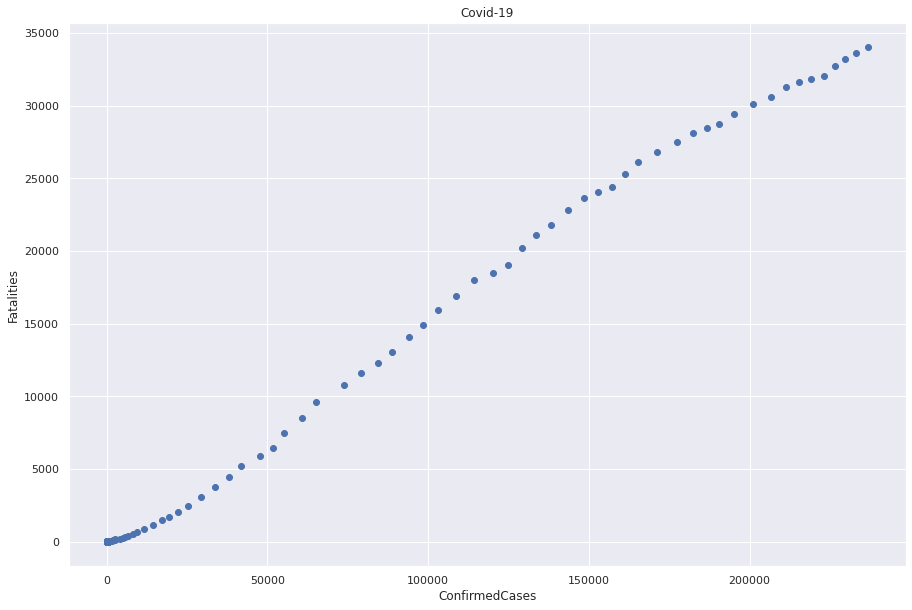

In [529]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(uk['ConfirmedCases'], uk['Fatalities'])
# set a title and labels
ax.set_title('Covid-19')
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()


<AxesSubplot:>

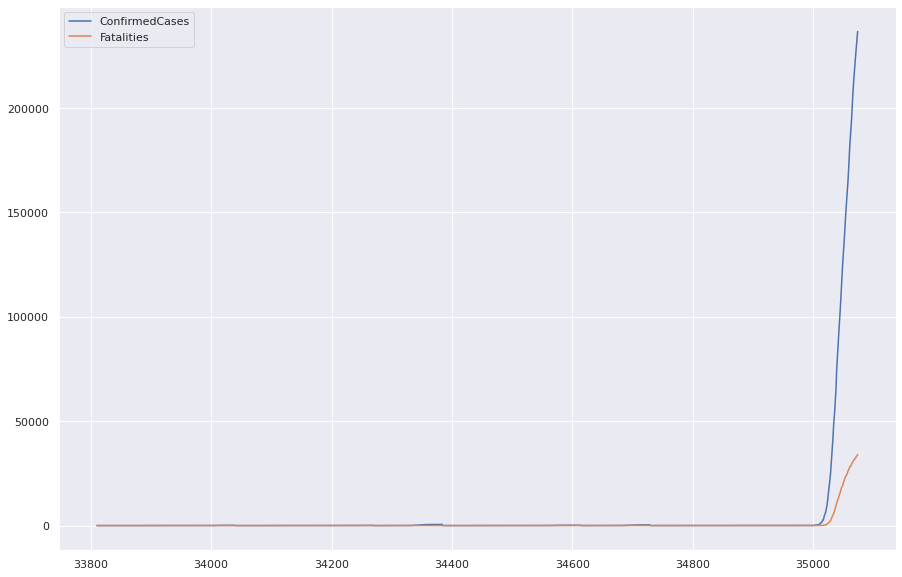

In [530]:
# Create a new DataFrame with the confirmed cases and deaths columns
cases_deaths_df = uk[['ConfirmedCases', 'Fatalities']]

# Plot the confirmed cases and deaths on the same chart
cases_deaths_df.plot()


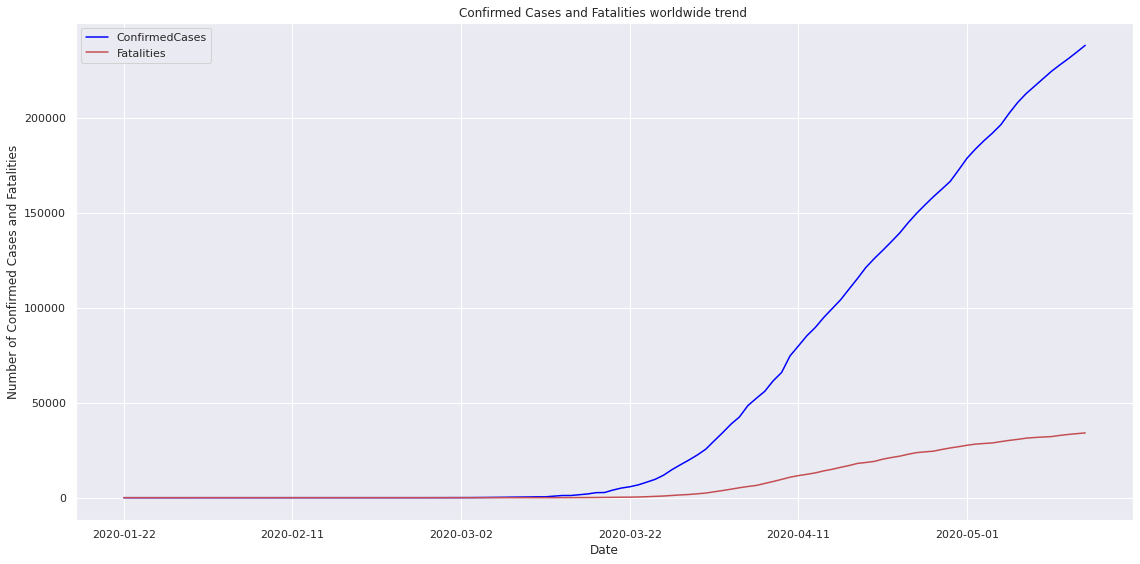

In [531]:

plt.figure(figsize=(16,8))
uk.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
uk.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()





/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



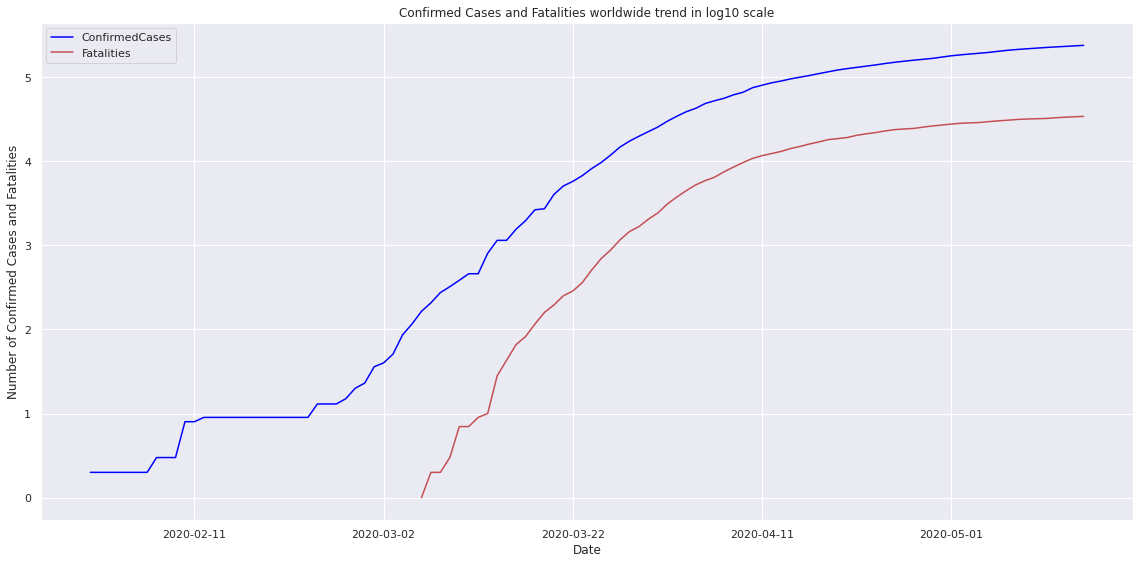

In [532]:
plt.figure(figsize=(16,8))
np.log10(uk.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(uk.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()

In [533]:
cc=uk.groupby('Date')['ConfirmedCases'].sum()
ft=uk.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)



0.9970175778835656


# Analyses statistiques sur Algeria

In [534]:
al= df_train[df_train.Country_Region =='Algeria']
al

Country_Region        Date  ConfirmedCases  Fatalities
230        Algeria  2020-01-22             0.0         0.0
231        Algeria  2020-01-23             0.0         0.0
232        Algeria  2020-01-24             0.0         0.0
233        Algeria  2020-01-25             0.0         0.0
234        Algeria  2020-01-26             0.0         0.0
..             ...         ...             ...         ...
340        Algeria  2020-05-11          5891.0       507.0
341        Algeria  2020-05-12          6067.0       515.0
342        Algeria  2020-05-13          6253.0       522.0
343        Algeria  2020-05-14          6442.0       529.0
344        Algeria  2020-05-15          6629.0       536.0

[115 rows x 4 columns]

In [535]:
al.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 230 to 344
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  115 non-null    object 
 1   Date            115 non-null    object 
 2   ConfirmedCases  115 non-null    float64
 3   Fatalities      115 non-null    float64
dtypes: float64(2), object(2)
memory usage: 4.5+ KB


In [536]:
print(al.shape)

(115, 4)


In [537]:
al.describe()

ConfirmedCases  Fatalities
count      115.000000  115.000000
mean      1346.478261  146.808696
std       1916.610753  196.152326
min          0.000000    0.000000
25%          0.000000    0.000000
50%         87.000000    9.000000
75%       2343.000000  356.000000
max       6629.000000  536.000000

In [538]:
al.isnull().sum()


Country_Region    0
Date              0
ConfirmedCases    0
Fatalities        0
dtype: int64

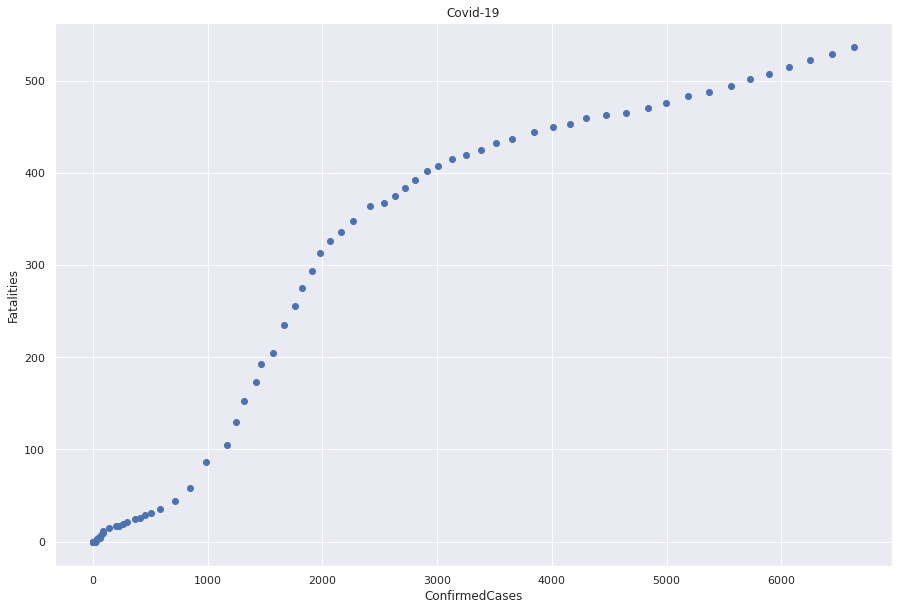

In [539]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(al['ConfirmedCases'], al['Fatalities'])
# set a title and labels
ax.set_title('Covid-19')
ax.set_xlabel('ConfirmedCases')
ax.set_ylabel('Fatalities')
plt.show()



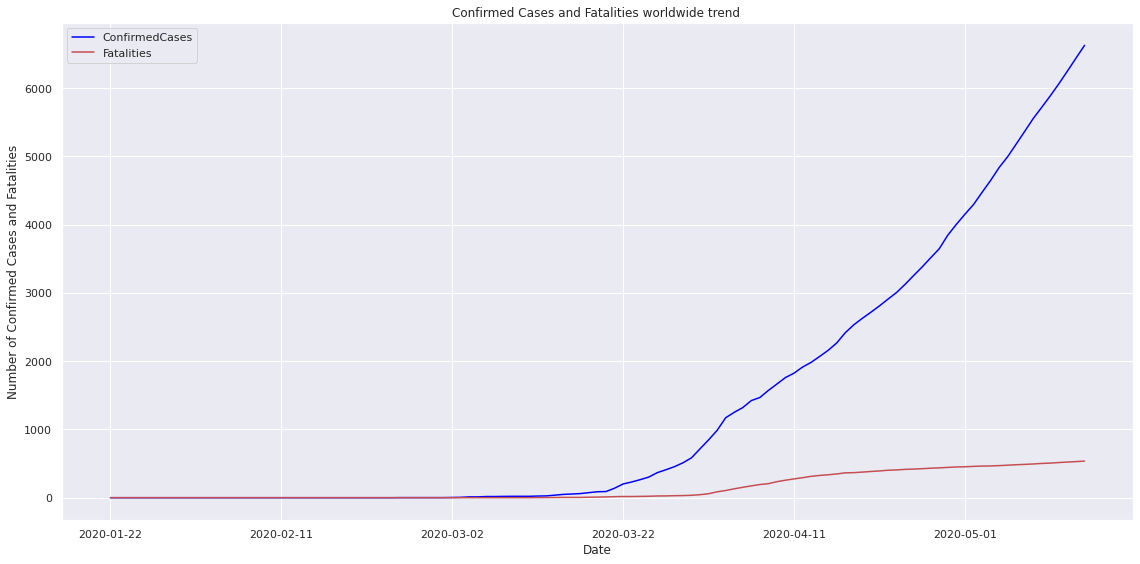

In [540]:
plt.figure(figsize=(16,8))
al.groupby('Date')['ConfirmedCases'].sum().plot(color='blue')
al.groupby('Date')['Fatalities'].sum().plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend ')
plt.legend()
plt.tight_layout()

       

/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

/home/ubuntu/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



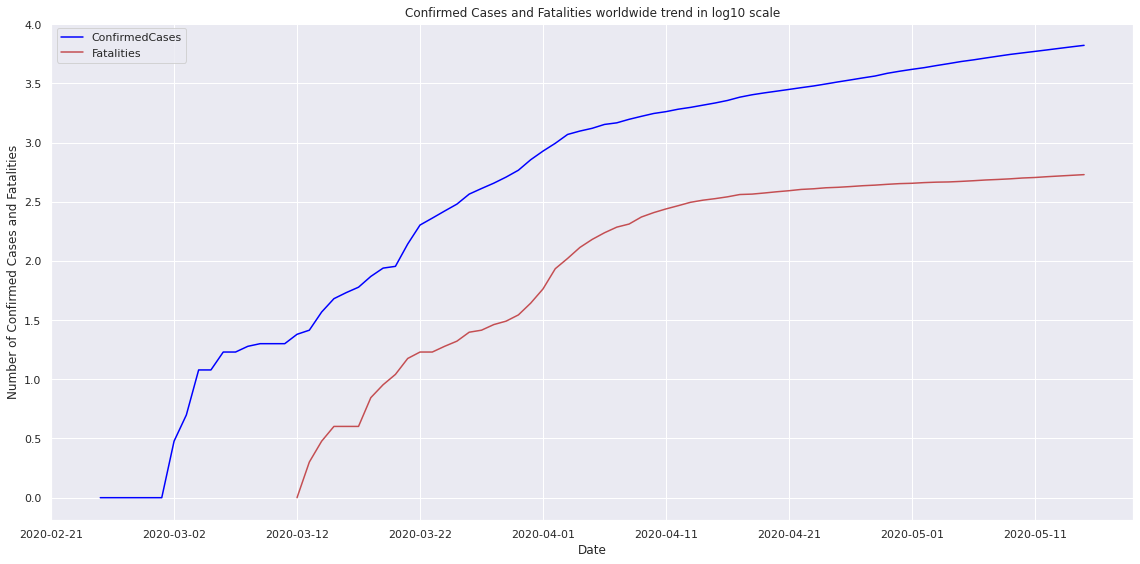

In [541]:
plt.figure(figsize=(16,8))
np.log10(al.groupby('Date')['ConfirmedCases'].sum()).plot(color='blue')
np.log10(al.groupby('Date')['Fatalities'].sum()).plot(color='r')
plt.ylabel('Number of Confirmed Cases and Fatalities')
plt.title('Confirmed Cases and Fatalities worldwide trend in log10 scale')
plt.legend()
plt.tight_layout()


In [591]:
cc=al.groupby('Date')['ConfirmedCases'].sum()
ft=al.groupby('Date')['Fatalities'].sum()

fig = go.Figure(data=go.Scatter(x=cc, y=ft, mode='lines+markers'))
# Edit the layout
fig.update_layout(title='Corelation between ConfirmedCases and Fatalities worldwide',
                   xaxis_title='Confirmed Cases ',
                   yaxis_title='Fatalities')
fig.show()

correlation_matrix = np.corrcoef(cc, ft)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)


0.9356213191481172


# Random Forest Regressor

### "Conversion de la colonne 'Date' en format datetime et création de nouvelles colonnes 'month' et 'day'"

In [546]:
le = LabelEncoder()

# Encodez la colonne "Country_Region"
df_train['Country_Region'] = le.fit_transform(df_train['Country_Region'])
df_train['Date'] = pd.to_datetime(df['Date'])
df_train['month'] = df_train['Date'].dt.month
df_train['day'] = df_train['Date'].dt.day
df_train = df_train.drop("Date", axis=1)
df_train

Country_Region  ConfirmedCases  Fatalities  month  day
0                   0             0.0         0.0      1   22
1                   0             0.0         0.0      1   23
2                   0             0.0         0.0      1   24
3                   0             0.0         0.0      1   25
4                   0             0.0         0.0      1   26
...               ...             ...         ...    ...  ...
35990             183            36.0         4.0      5   11
35991             183            36.0         4.0      5   12
35992             183            37.0         4.0      5   13
35993             183            37.0         4.0      5   14
35994             183            42.0         4.0      5   15

[35995 rows x 5 columns]

### Séparation des données d'entraînement et de test avec train_test_split

In [568]:
from sklearn.model_selection import train_test_split
X = df_train[['Country_Region','month']]
y = df_train[['ConfirmedCases','Fatalities']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [569]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(28796, 2) (7199, 2) (28796, 2) (7199, 2)


In [570]:
# random forest model

In [571]:
from sklearn.ensemble import RandomForestRegressor

### Conversion des données de formation de y en format flottant de 64 bits

In [572]:
y_train = y_train.astype(np.float64)


### Entraînement du modèle de forêt aléatoire régresseur

In [573]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the model
model = RandomForestRegressor()
model = model.fit(X_train, y_train)
model

RandomForestRegressor()

### Prédiction des données d'entraînement avec la forêt aléatoire régresseur

In [574]:
ytrain_pred = model.predict(X_test)


### Evaluation des performances du modèle d'entraînement avec MSE et R2 score

In [575]:
print("Mean squared error: ", mean_squared_error(ytrain_pred, y_test)%1)


Mean squared error:  0.3274812698364258


In [582]:
print("R2 score: ", r2_score(ytrain_pred, y_test)%1)

R2 score:  0.8407305612196607


### Evaluation du modèle de forêt aléatoire de régression sur les données d'entraînement

In [577]:
print (model.score(ytrain_pred, y_test)%1)

0.9419986960010638


/home/ubuntu/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Mean Absolute Error (MAE) calculation for training set

In [578]:
print ( mean_absolute_error(ytrain_pred, y_test)%1)

0.3843630476264934


### RMSE
RMSE signifie "erreur quadratique moyenne" et c'est une mesure de la différence entre les valeurs prédites et les valeurs réelles pour un ensemble de données. Il est souvent utilisé pour évaluer la performance d'un modèle de prédiction en comparant les valeurs prédites à celles qui ont été observées. Plus le RMSE est faible, meilleur est le modèle.

In [583]:
np.sqrt(mean_squared_error(ytrain_pred, y_test)%1)

0.476949965757862

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


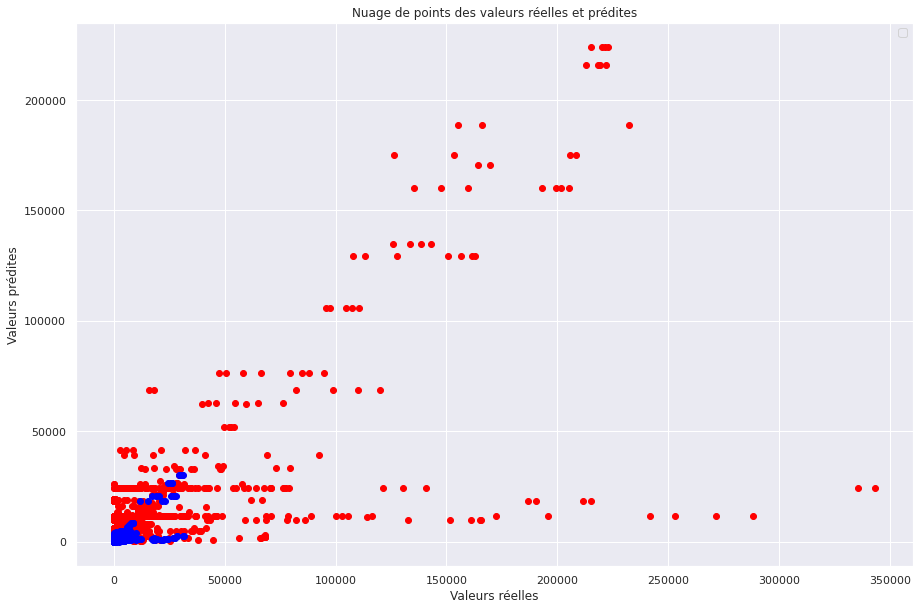

In [581]:
import matplotlib.pyplot as plt

plt.scatter(y_test["ConfirmedCases"], ytrain_pred[:,0], color="red")
plt.scatter(y_test["Fatalities"], ytrain_pred[:,1], color="blue")

plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Nuage de points des valeurs réelles et prédites")
plt.legend()
plt.show()
